## DIGITS

### **NAME:** Ramiro Alberto Rios Pérez

#### Librerias

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

### Cargar y explorar los datos

In [46]:
# Cargar el dataset
data = pd.read_csv('mnist_784.csv')

In [47]:
# Mostrar las primeras filas
print(data.head())


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  class  
0         0         0

In [48]:
# Ver las dimensiones del dataset
print(f"Forma del dataset: {data.shape}")

Forma del dataset: (70000, 785)


In [49]:
# Ver distribución de clases
print(data['class'].value_counts())

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


El dataset tiene 784 columnas de píxeles (28x28) más una columna 'class' con la etiqueta del dígito (0-9).



### Preprocesamiento de los datos

In [50]:
# Separar características (X) y etiquetas (y)
X = data.drop('class', axis=1).values / 255.0 # normalizar pixeles
y = data['class'].values

In [51]:
# 3. Convertir etiquetas a one-hot encoding
y = to_categorical(y, num_classes=10)

In [52]:
# Normalizar los valores de píxeles a [0, 1]
X = X / 255.0

In [53]:
# Normalizar los valores de píxeles a [0, 1]
X = X / 255.0

In [54]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

Forma de X_train: (56000, 784)
Forma de y_train: (56000, 10)
Forma de X_test: (14000, 784)
Forma de y_test: (14000, 10)


### Construir el modelo de red neuronal

In [56]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

In [57]:
# 7. Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1083 - loss: 2.3019 - val_accuracy: 0.1166 - val_loss: 2.3020
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1124 - loss: 2.3014 - val_accuracy: 0.1166 - val_loss: 2.3016
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1119 - loss: 2.3013 - val_accuracy: 0.1166 - val_loss: 2.3017
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1125 - loss: 2.3010 - val_accuracy: 0.1166 - val_loss: 2.3019
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1131 - loss: 2.3010 - val_accuracy: 0.1166 - val_loss: 2.3016
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1132 - loss: 2.3010 - val_accuracy: 0.1166 - val_loss: 2.3016
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1129 - loss: 2.3011 - val_accuracy: 0.1166 - val_loss: 2.3017
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1151 - loss: 2.3014 - val_acc

### Evaluar el modelo

In [58]:
# Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')


Precisión en el conjunto de prueba: 0.1143


In [59]:
# Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

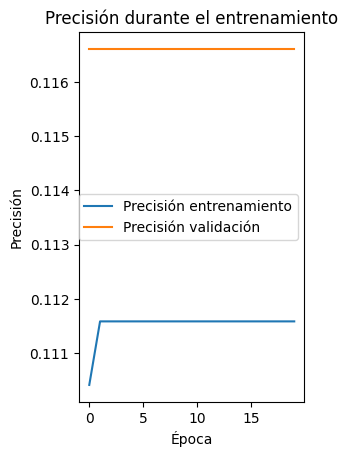

In [60]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()


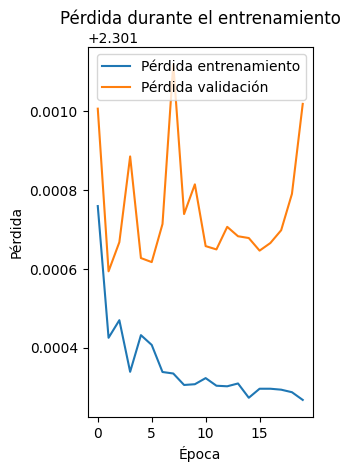

In [61]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

In [62]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Visualizar predicciones

In [63]:
# Hacer predicciones
predictions = model.predict(X_test)


438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [64]:
# Seleccionar algunas imágenes aleatorias para visualizar
num_images = 5
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)

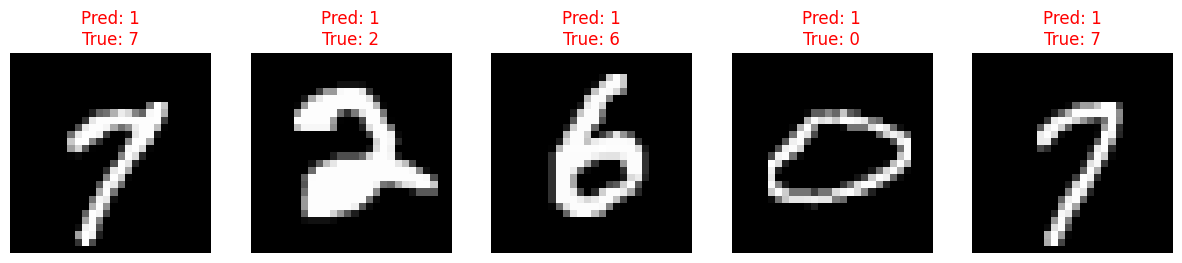

In [69]:
plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[idx])
    true_label = np.argmax(y_test[idx])
    plt.title(f'Pred: {pred_label}\nTrue: {true_label}', color='green' if pred_label == true_label else 'red')
    plt.axis('off')
plt.show()

### Matrix de confusión

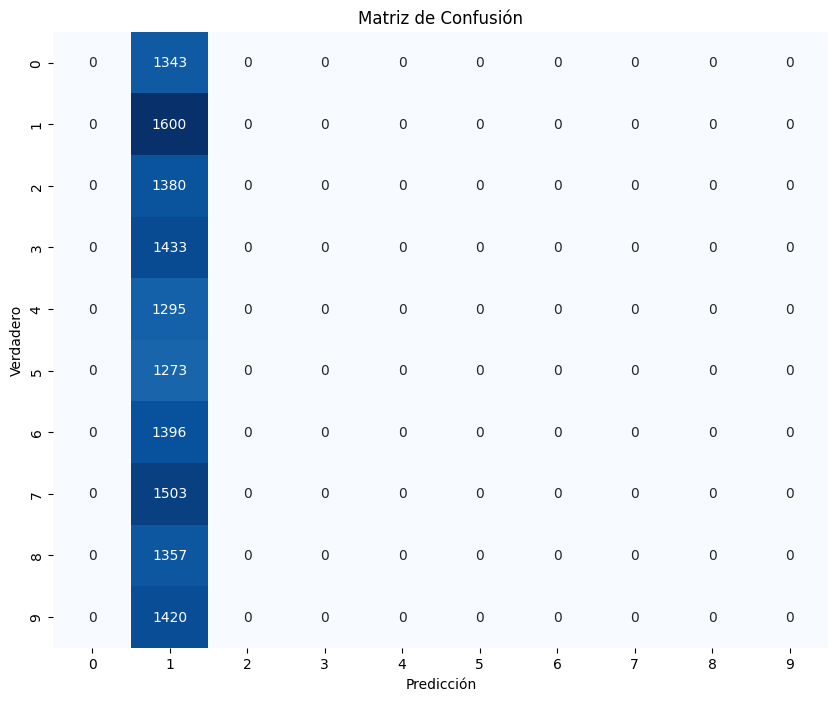

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener predicciones
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

### Resultados esperados

Un modelo con precisión de entrenamiento >98%

Precisión en el conjunto de prueba >97%

Gráficos de precisión/pérdida durante el entrenamiento

Visualización de algunas predicciones con etiquetas

Matriz de confusión (opcional)